Instalando o o solver ipopt

In [ ]:
# Instala o condacolab
!pip install -q condacolab
import condacolab
condacolab.install()

# Instala Pyomo e Ipopt via conda
!conda install -c conda-forge pyomo ipopt -y

# Verifica a instalação
from pyomo.environ import SolverFactory
print("\n--- Verificação da Instalação ---")
print("Pyomo instalado com sucesso.")

# Verifique se o Ipopt está disponível e pode ser chamado pelo Pyomo
ipopt_solver = SolverFactory('ipopt')
print(f"Ipopt disponível para Pyomo: {ipopt_solver.available()}")

# Se o resultado for True, a instalação foi bem-sucedida.
if ipopt_solver.available():
    print("O solver Ipopt está pronto para ser usado.")
else:
    print("O solver Ipopt não foi encontrado. Verifique a instalação.")

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.


--- Verificação da Instalação ---
Pyomo instalado com sucesso.
Ipopt disponível para Pyomo: True
O solver Ipopt está pronto para ser usado.


In [ ]:
!apt-get install -y coinor-libipopt1v5 coinor-libipopt-dev
!pip install cyipopt


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
coinor-libipopt-dev is already the newest version (3.11.9-2.2build5).
coinor-libipopt1v5 is already the newest version (3.11.9-2.2build5).
The following packages were automatically installed and are no longer required:
  libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pandas as pd
import yfinance as yf
import os

# Lista de tickers e período... (sem alterações)
tickers_alta = ['VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'PETR3.SA', 'BBDC4.SA', 'B3SA3.SA', 'ITSA4.SA', 'BBAS3.SA', 'ELET3.SA', 'ABEV3.SA']
tickers_mediana = ['SUZB3.SA', 'RADL3.SA', 'RENT3.SA', 'EQTL3.SA', 'CMIG4.SA', 'CPFE3.SA', 'BBSE3.SA', 'EGIE3.SA', 'KLBN11.SA', 'TOTS3.SA']
tickers_baixa = ['GOAU4.SA', 'MGLU3.SA', 'CVCB3.SA', 'BRFS3.SA', 'SBSP3.SA', 'MRVE3.SA', 'COGN3.SA', 'HAPV3.SA', 'BHIA3.SA', 'AZUL4.SA']
todos_tickers = tickers_alta + tickers_mediana + tickers_baixa
data_inicio = '2024-01-02'
data_fim = pd.to_datetime('today').strftime('%Y-%m-%d')

# Baixando os dados
try:
    dados_precos = yf.download(todos_tickers, start=data_inicio, end=data_fim)['Close']
except Exception as e:
    print(f"Ocorreu um erro ao baixar os dados: {e}")
    dados_precos = None

if dados_precos is not None:
    retornos_diarios = dados_precos.pct_change().dropna()
    retornos_diarios.columns = [col.replace('.SA', '') for col in retornos_diarios.columns]

    # --- Começa o diagnóstico ---

    # 1. Verifique se o DataFrame tem dados
    if retornos_diarios.empty:
        print("\nErro: O DataFrame de retornos está vazio. Verifique se os dados foram baixados corretamente.")
    else:
        print("Tabela com os Retornos Diários das Ações (primeiras 5 linhas):")
        print(retornos_diarios.head())

        # 2. Defina o caminho e o nome do arquivo
        diretorio_destino = '/content/drive/MyDrive/'
        nome_arquivo = 'retornos_acoes_ibovespa_2024_.csv'
        caminho_completo_csv = os.path.join(diretorio_destino, nome_arquivo)

        # 3. Verifique se a pasta de destino existe
        if not os.path.exists(diretorio_destino):
            print(f"\nErro: O diretório '{diretorio_destino}' não foi encontrado.")
        else:
            try:
                # 4. Tente salvar o arquivo
                retornos_diarios.to_csv(caminho_completo_csv)
                print(f"\nArquivo '{caminho_completo_csv}' criado com sucesso.")
            except Exception as e:
                # 5. Capture erros de permissão
                print(f"\nErro ao salvar o arquivo: {e}")
                print("Verifique se o seu script tem permissão de escrita para a pasta especificada.")

else:
    print("Não foi possível calcular os retornos devido a um erro no download dos dados.")

/tmp/ipython-input-3296883637.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_precos = yf.download(todos_tickers, start=data_inicio, end=data_fim)['Close']
[*********************100%***********************]  30 of 30 completed


Tabela com os Retornos Diários das Ações (primeiras 5 linhas):
               ABEV3     AZUL4     B3SA3     BBAS3     BBDC4     BBSE3  \
Date                                                                     
2024-01-03 -0.008023 -0.033333 -0.002823  0.000913  0.001134 -0.004426   
2024-01-04  0.003676 -0.026038 -0.029016 -0.010582 -0.013731  0.007113   
2024-01-05 -0.003663 -0.000723  0.018222  0.011986  0.021792 -0.008829   
2024-01-08  0.008088  0.076645  0.022190  0.008564 -0.007701 -0.004750   
2024-01-09 -0.006565 -0.004701 -0.015406 -0.014995 -0.026866 -0.003580   

               BHIA3     BRFS3     CMIG4     COGN3  ...     MGLU3     MRVE3  \
Date                                                ...                       
2024-01-03 -0.012613 -0.049057  0.011464  0.002976  ... -0.024390 -0.025187   
2024-01-04 -0.055657 -0.002381 -0.004359 -0.035608  ... -0.035000 -0.061244   
2024-01-05  0.004831  0.015115  0.010508  0.027692  ...  0.020725  0.005097   
2024-01-08  0.067308 -0

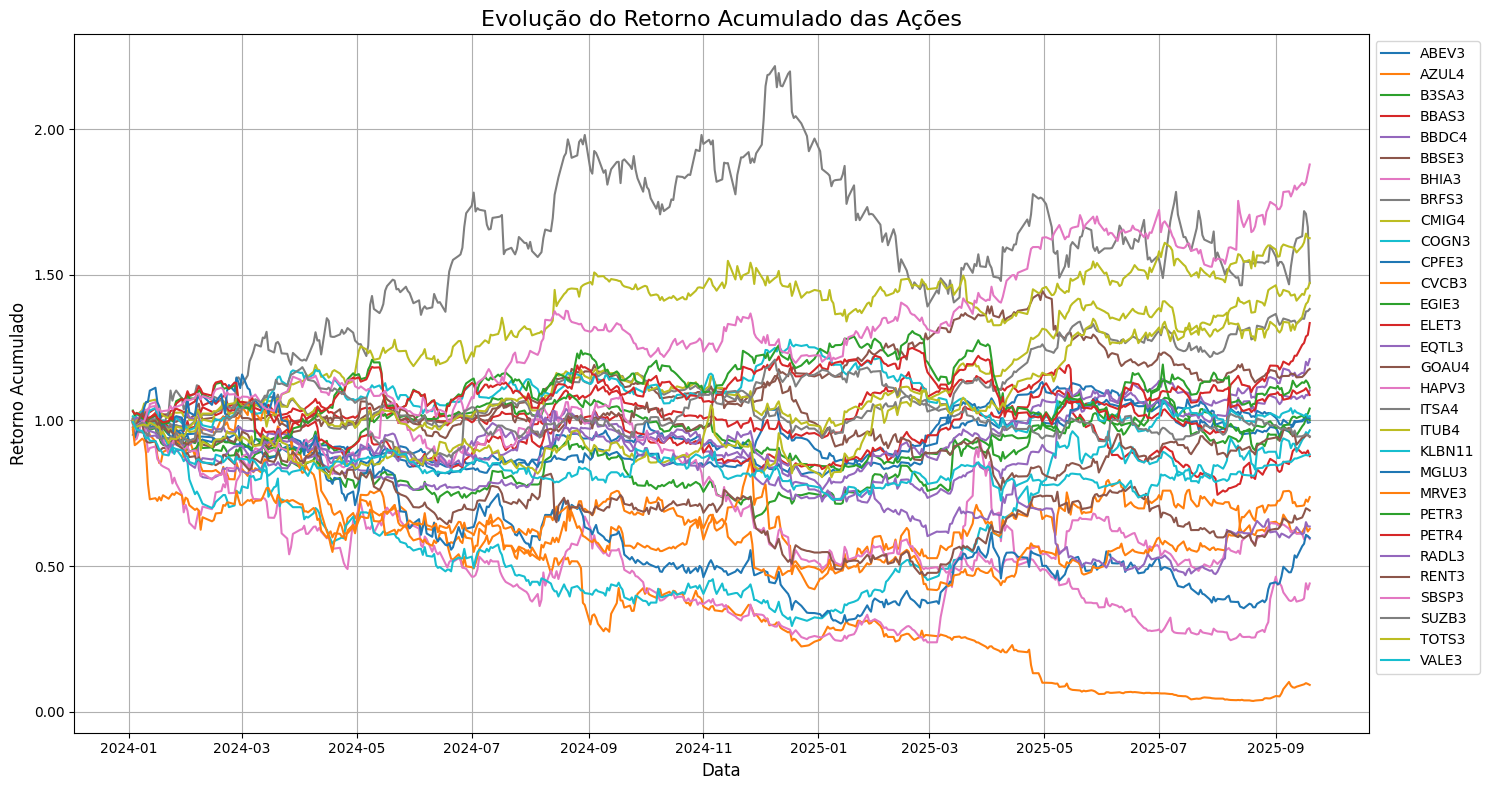


Gráfico salvo em '/content/drive/MyDrive/retornos_acoes_ibovespa_2024.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
# --- Adicionando o Gráfico de Retorno Acumulado ---
import matplotlib.pyplot as plt

# 1. Calcule o retorno acumulado
retorno_acumulado = (1 + retornos_diarios).cumprod()

# 2. Crie a figura e o eixo do gráfico
plt.figure(figsize=(15, 8))

# 3. Plote o gráfico
plt.plot(retorno_acumulado)

# 4. Adicione títulos e rótulos
plt.title('Evolução do Retorno Acumulado das Ações', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Acumulado', fontsize=12)
plt.grid(True)

# 5. Adicione a legenda com os nomes das ações
plt.legend(retorno_acumulado.columns, loc='upper left', bbox_to_anchor=(1, 1))

# 6. Melhore a formatação do eixo y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# 7. Ajuste o layout e mostre o gráfico
plt.tight_layout()
plt.show()

# 8. (Opcional) Salve o gráfico em um arquivo
try:
    caminho_completo_grafico = os.path.join(diretorio_destino, 'retornos_acoes_ibovespa_2024.png')
    plt.savefig(caminho_completo_grafico)
    print(f"\nGráfico salvo em '{caminho_completo_grafico}'")
except Exception as e:
    print(f"\nErro ao salvar o gráfico: {e}")

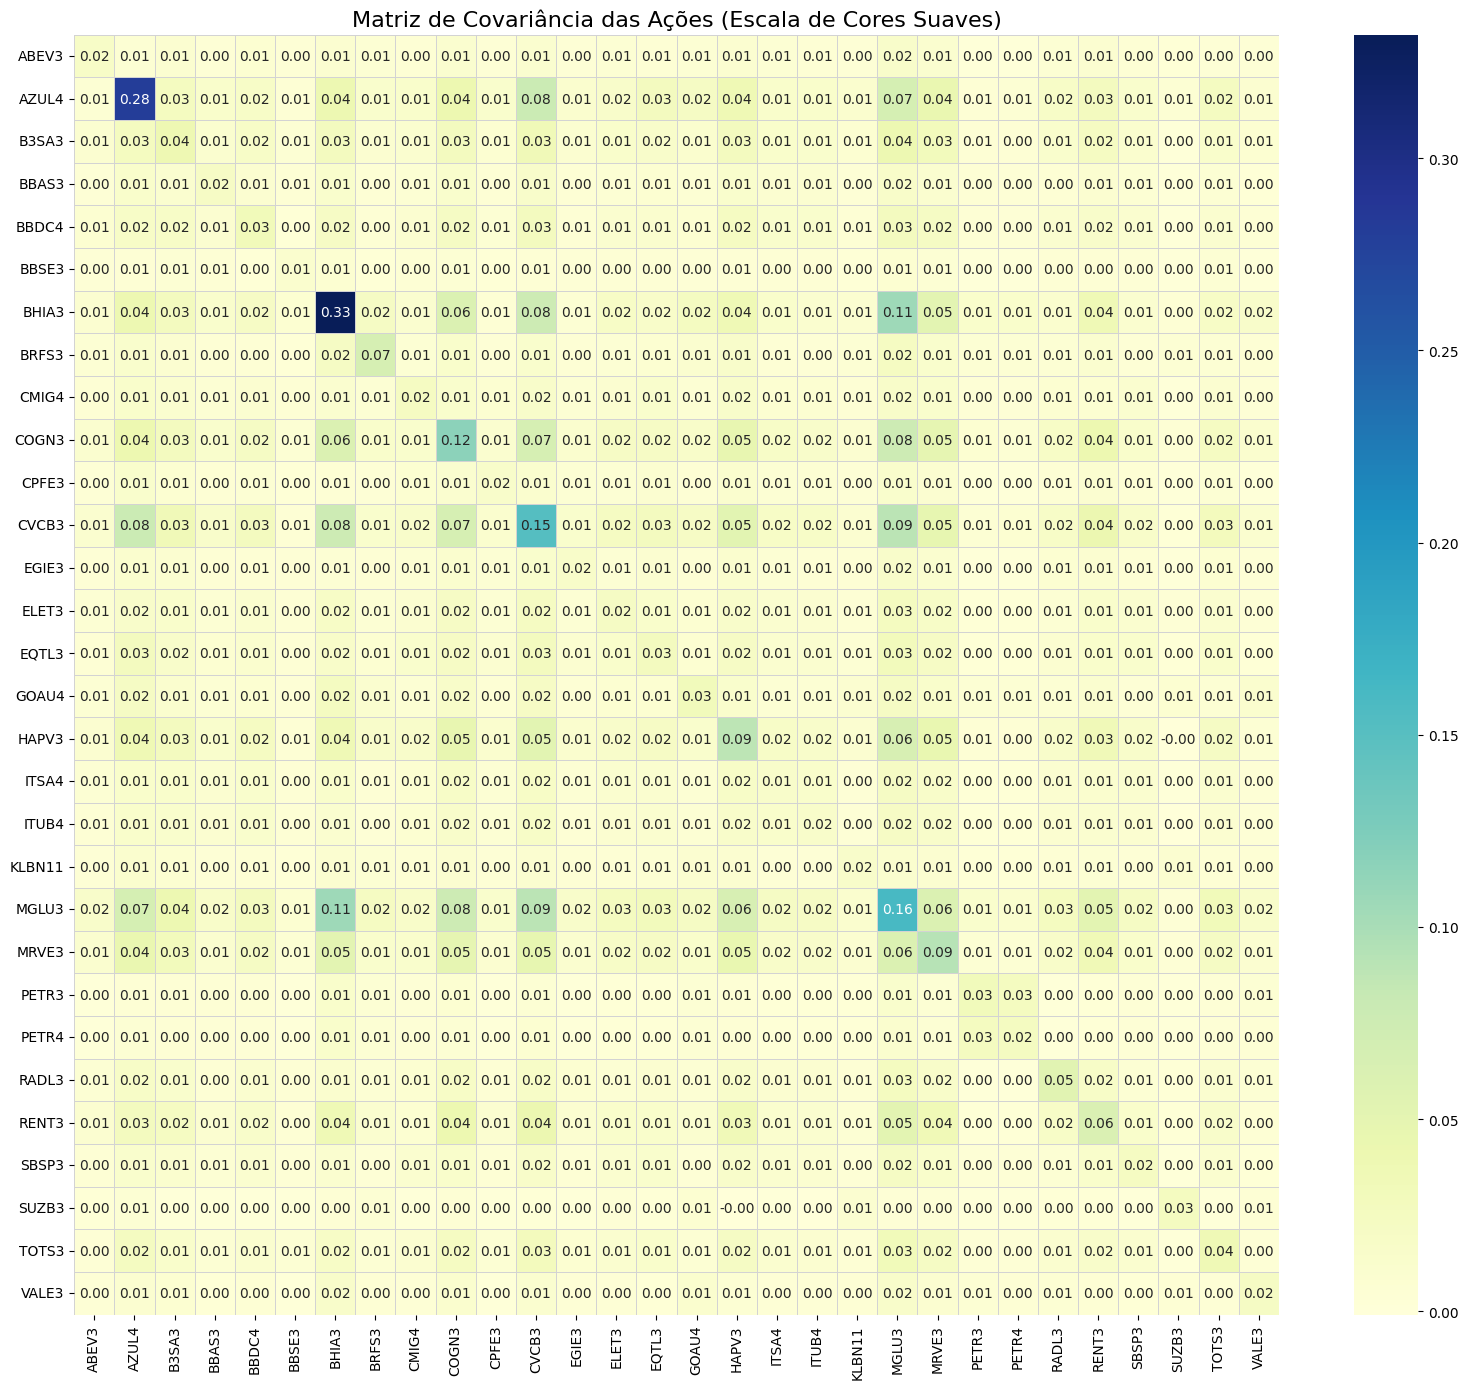


Matriz de covariância (heatmap) com cores suaves salva em '/content/drive/MyDrive/matriz_covariancia_heatmap_suave_2024.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
# --- Adicionando a Matriz de Variância e Covariância (Heatmap) com cores mais suaves ---
import seaborn as sns
import matplotlib.pyplot as plt # Certifique-se de que matplotlib.pyplot também está importado

if not retornos_diarios.empty:
    # 1. Calcule a matriz de covariância
    matriz_covariancia = retornos_diarios.cov()*100

    # 2. Crie a figura e o eixo para o mapa de calor
    plt.figure(figsize=(16, 14)) # Ajuste o tamanho conforme o número de ações

    # 3. Plote o mapa de calor com um colormap mais suave (ex: "YlGnBu", "Blues", "light:#0072B2")
    # 'cmap="YlGnBu"' é uma boa escolha para suavidade e progressão
    sns.heatmap(matriz_covariancia, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, linecolor='lightgray')

    # 4. Adicione título
    plt.title('Matriz de Covariância das Ações (Escala de Cores Suaves)', fontsize=16)
    plt.xticks(rotation=90) # Rotaciona os nomes das colunas para melhor leitura
    plt.yticks(rotation=0)  # Mantém os nomes das linhas na horizontal

    # 5. Ajuste o layout e mostre o gráfico
    plt.tight_layout()
    plt.show()

    # 6. (Opcional) Salve o gráfico em um arquivo
    try:
        caminho_completo_heatmap = os.path.join(diretorio_destino, 'matriz_covariancia_heatmap_suave_2024.png')
        plt.savefig(caminho_completo_heatmap)
        print(f"\nMatriz de covariância (heatmap) com cores suaves salva em '{caminho_completo_heatmap}'")
    except Exception as e:
        print(f"\nErro ao salvar o gráfico do heatmap com cores suaves: {e}")
else:
    print("\nNão foi possível gerar a matriz de covariância pois o DataFrame de retornos está vazio.")

Modelo de markovitz minimizando o risco para um retorno alvo de 15% ao ano

In [ ]:
import pandas as pd
import numpy as np
import os
from pyomo.environ import *
from cyipopt import minimize_ipopt

# --- Leitura dos dados ---
diretorio_destino = '/content/drive/MyDrive/'
nome_arquivo = 'retornos_acoes_ibovespa_2024.csv'
caminho_completo_csv = os.path.join(diretorio_destino, nome_arquivo)

try:
    retornos_diarios = pd.read_csv(caminho_completo_csv, index_col=0, parse_dates=True)
    if retornos_diarios.empty:
        print(f"Aviso: O arquivo '{caminho_completo_csv}' foi lido, mas está vazio.")
    retornos_diarios.columns = [col.replace('.SA', '') for col in retornos_diarios.columns]
except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_completo_csv}' não foi encontrado.")
    exit()

# --- Cálculo de estatísticas ---
retornos_medios_diarios = retornos_diarios.mean()
matriz_covariancia_diaria = retornos_diarios.cov()

# --- Parâmetros do modelo ---
ativos = retornos_diarios.columns.tolist()
num_ativos = len(ativos)
retorno_alvo_anual = 0.15
retorno_alvo_diario = retorno_alvo_anual / 252

# --- Criação do modelo Pyomo ---
model = ConcreteModel()

# Conjuntos
model.A = Set(initialize=ativos)

# Variáveis
model.w = Var(model.A, domain=NonNegativeReals, bounds=(0,1))

# Restrição: soma dos pesos = 1
def regra_soma_pesos(model):
    return sum(model.w[a] for a in model.A) == 1
model.restricao_soma = Constraint(rule=regra_soma_pesos)



# Restrição: retorno esperado = retorno alvo
def regra_retorno(model):
    return sum(model.w[a] * retornos_medios_diarios[a] for a in model.A) == retorno_alvo_diario
model.restricao_retorno = Constraint(rule=regra_retorno)

# Função objetivo: minimizar variância (risco²), que é w.T * Cov * w
def objetivo_variancia(model):
    return sum(model.w[i] * model.w[j] * matriz_covariancia_diaria.loc[i, j] for i in model.A for j in model.A)
model.objetivo = Objective(rule=objetivo_variancia, sense=minimize)

# --- Resolver ---
solver = SolverFactory('ipopt')  # ou 'ipopt' se disponível
resultado = solver.solve(model, tee=True)

# --- Resultados ---
pesos_otimizados = pd.Series({a: value(model.w[a]) for a in model.A})
retorno_final = np.dot(retornos_medios_diarios, pesos_otimizados) * 252
risco_final = np.sqrt(np.dot(pesos_otimizados.T, np.dot(matriz_covariancia_diaria, pesos_otimizados))) * np.sqrt(252)

print("\n--- Otimização de Carteira com Pyomo ---")
print(f"Retorno Anualizado da Carteira: {retorno_final:.2%}")
print(f"Risco (Desvio Padrão) Anualizado: {risco_final:.2%}")

print("\nPesos Otimizados:")
print(pesos_otimizados.apply(lambda x: f"{x:.2%}"))


Ipopt 3.14.19: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:       60
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      465

Total number of variables............................:       30
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       30
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number

Modelo com restrição de peso

In [ ]:
import pandas as pd
import numpy as np
import os
from pyomo.environ import *
from cyipopt import minimize_ipopt

# --- Leitura dos dados ---
diretorio_destino = '/content/drive/MyDrive/'
nome_arquivo = 'retornos_acoes_ibovespa_2024.csv'
caminho_completo_csv = os.path.join(diretorio_destino, nome_arquivo)

try:
    retornos_diarios = pd.read_csv(caminho_completo_csv, index_col=0, parse_dates=True)
    if retornos_diarios.empty:
        print(f"Aviso: O arquivo '{caminho_completo_csv}' foi lido, mas está vazio.")
    retornos_diarios.columns = [col.replace('.SA', '') for col in retornos_diarios.columns]
except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_completo_csv}' não foi encontrado.")
    exit()

# --- Cálculo de estatísticas ---
retornos_medios_diarios = retornos_diarios.mean()
matriz_covariancia_diaria = retornos_diarios.cov()

# --- Parâmetros do modelo ---
ativos = retornos_diarios.columns.tolist()
num_ativos = len(ativos)
retorno_alvo_anual = 0.15
retorno_alvo_diario = retorno_alvo_anual / 252

# --- Criação do modelo Pyomo ---
model = ConcreteModel()

# Conjuntos
model.A = Set(initialize=ativos)

# Variáveis
model.w = Var(model.A, domain=NonNegativeReals, bounds=(0,1))

# Restrição: soma dos pesos = 1
def regra_soma_pesos(model):
    return sum(model.w[a] for a in model.A) == 1
model.restricao_soma = Constraint(rule=regra_soma_pesos)

# Restrição: participacao menor ou igual a 10%
def regra_teto(model, a):
    return model.w[a] <= 0.08
model.teto_peso = Constraint(model.A, rule=regra_teto)


# Restrição: retorno esperado = retorno alvo
def regra_retorno(model):
    return sum(model.w[a] * retornos_medios_diarios[a] for a in model.A) == retorno_alvo_diario
model.restricao_retorno = Constraint(rule=regra_retorno)

# Função objetivo: minimizar variância (risco²), que é w.T * Cov * w
def objetivo_variancia(model):
    return sum(model.w[i] * model.w[j] * matriz_covariancia_diaria.loc[i, j] for i in model.A for j in model.A)
model.objetivo = Objective(rule=objetivo_variancia, sense=minimize)

# --- Resolver ---
solver = SolverFactory('ipopt')  # ou 'ipopt' se disponível
resultado = solver.solve(model, tee=True)

# --- Resultados ---
pesos_otimizados = pd.Series({a: value(model.w[a]) for a in model.A})
retorno_final = np.dot(retornos_medios_diarios, pesos_otimizados) * 252
risco_final = np.sqrt(np.dot(pesos_otimizados.T, np.dot(matriz_covariancia_diaria, pesos_otimizados))) * np.sqrt(252)

print("\n--- Otimização de Carteira com Pyomo ---")
print(f"Retorno Anualizado da Carteira: {retorno_final:.2%}")
print(f"Risco (Desvio Padrão) Anualizado: {risco_final:.2%}")

print("\nPesos Otimizados:")
print(pesos_otimizados.apply(lambda x: f"{x:.2%}"))


Ipopt 3.14.19: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:       60
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:      465

Total number of variables............................:       30
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       30
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number

Modelo de maximização de retorno

In [ ]:
import pandas as pd
import numpy as np
import os
import pyomo.environ as pyo

# --- Leitura dos dados ---
diretorio_destino = '/content/drive/MyDrive/'
nome_arquivo = 'retornos_acoes_ibovespa_2024.csv'
caminho_completo_csv = os.path.join(diretorio_destino, nome_arquivo)

retornos_diarios = pd.read_csv(caminho_completo_csv, index_col=0, parse_dates=True)
retornos_diarios.columns = [c.replace('.SA', '') for c in retornos_diarios.columns]

# --- Estatísticas ---
mu_d = retornos_diarios.mean()        # média diária
Sigma_d = retornos_diarios.cov()      # cov diária

ativos = retornos_diarios.columns.tolist()
n = len(ativos)

# Risco alvo = média dos desvios-padrão anuais individuais
std_ind_anu = retornos_diarios.std() * np.sqrt(252.0)
sigma_alvo = float(std_ind_anu.mean())
var_alvo = (sigma_alvo**2)/4

ANUAL = 252.0
CAP = 0.04  # 8% por ativo (ajuste se quiser)

# --- Modelo Pyomo: max retorno, risco <= alvo, long-only, cap por ativo ---
m = pyo.ConcreteModel()
m.A = pyo.Set(initialize=ativos)

def bounds_w(m, a):
    return (0.0, CAP)   # long-only e teto de 8%
m.w = pyo.Var(m.A, bounds=bounds_w)

# orçamento
m.budget = pyo.Constraint(expr=sum(m.w[a] for a in m.A) == 1.0)

# risco anual da carteira <= alvo: (w' Σ_d w)*252 <= sigma_alvo^2
Sigma_np = Sigma_d.values
idx = {a:i for i,a in enumerate(ativos)}
m.risk = pyo.Constraint(
    expr = ANUAL * sum(m.w[i]*Sigma_np[idx[i], idx[j]]*m.w[j] for i in m.A for j in m.A) == var_alvo
)

# objetivo: maximizar retorno anual esperado
mu_np = mu_d.values
m.obj = pyo.Objective(
    expr = ANUAL * sum(m.w[a]*mu_d[a] for a in m.A),
    sense = pyo.maximize
)

# --- Resolver com Ipopt e tolerâncias mais rígidas ---
solver = pyo.SolverFactory('ipopt')
solver.options.update({
    'tol': 1e-9,
    'constr_viol_tol': 1e-9,
    'compl_inf_tol': 1e-9,
    'bound_relax_factor': 0.0,   # não relaxar bounds
    'print_level': 3
})
res = solver.solve(m, tee=True)

# --- Extração dos pesos ---
w = pd.Series({a: pyo.value(m.w[a]) for a in m.A})

# Limpeza numérica: zera negativos muito pequenos e renormaliza
w[w < 0] = np.where(w[w < 0] > -1e-10, 0.0, w[w < 0])  # só zera “-0.00%”
if (w < -1e-8).any():
    print("Aviso: bounds violados numericamente. Ajustando e renormalizando.")
w = w.clip(lower=0.0)          # garante long-only
w = w / w.sum()                # renormaliza para somar 1

# --- Estatísticas finais ---
ret_anu = float(mu_d @ w) * ANUAL
var_anu = float(w.values @ Sigma_np @ w.values) * ANUAL
vol_anu = np.sqrt(var_anu)

print("\n--- Otimização de Carteira (Max Retorno, risco <= alvo) ---")
print(f"Risco alvo (média dos ativos): {sigma_alvo:.2%}")
print(f"Risco final da carteira:       {vol_anu:.2%}")
print(f"Retorno anualizado:            {ret_anu:.2%}\n")

print("Pesos (top 15):")
print((w.sort_values(ascending=False).head(40)*100).round(2).astype(str) + "%")


Ipopt 3.14.19: tol=1e-09
constr_viol_tol=1e-09
compl_inf_tol=1e-09
bound_relax_factor=0.0
print_level=3


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:       30
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       30
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:      

In [ ]:
import pandas as pd
import numpy as np
import os
import pyomo.environ as pyo

# --- Configurações e Parâmetros ---
ANUAL = 252.0
CAP = 0.04 # Teto de 4% por ativo

# --- Funções de Preparação de Dados e Otimização ---
def carregar_dados_e_calcular_estatisticas(caminho_csv):
    """Carrega dados, limpa nomes das colunas e calcula estatísticas de retorno."""
    try:
        retornos_diarios = pd.read_csv(caminho_csv, index_col=0, parse_dates=True)
        retornos_diarios.columns = [c.replace('.SA', '') for c in retornos_diarios.columns]

        # Otimização: Acesso aos dados como Series e DataFrames para clareza
        mu_d = retornos_diarios.mean()
        sigma_d = retornos_diarios.cov()

        return retornos_diarios, mu_d, sigma_d
    except FileNotFoundError:
        print(f"Erro: O arquivo '{caminho_csv}' não foi encontrado.")
        return None, None, None
    except Exception as e:
        print(f"Ocorreu um erro ao carregar os dados: {e}")
        return None, None, None

def construir_modelo_pyomo(ativos, mu_d, sigma_d, sigma_alvo):
    """Constrói e retorna o modelo de otimização Pyomo."""
    m = pyo.ConcreteModel()
    m.A = pyo.Set(initialize=ativos)

    # Variáveis: Pesos da carteira
    m.w = pyo.Var(m.A, bounds=(0.0, CAP))

    # Restrições
    # 1. Orçamento total
    m.budget = pyo.Constraint(expr=sum(m.w[a] for a in m.A) == 1.0)

    # 2. Risco alvo anual: (w' * sigma_d * w) * ANUAL <= sigma_alvo^2
    var_alvo = sigma_alvo**2
    m.risk = pyo.Constraint(
        expr=ANUAL * sum(m.w[i] * sigma_d.loc[i, j] * m.w[j] for i in m.A for j in m.A) <= var_alvo
    )

    # Objetivo: Maximizar retorno anualizado esperado
    m.obj = pyo.Objective(
        expr=ANUAL * sum(m.w[a] * mu_d[a] for a in m.A),
        sense=pyo.maximize
    )

    return m

def resolver_modelo(modelo):
    """Resolve o modelo Pyomo e trata o resultado."""
    solver = pyo.SolverFactory('ipopt')
    solver.options.update({
        'tol': 1e-9,
        'constr_viol_tol': 1e-9,
        'compl_inf_tol': 1e-9,
        'bound_relax_factor': 0.0,
        'print_level': 0  # Reduzir o nível de impressão para uma saída mais limpa
    })

    res = solver.solve(modelo, tee=False) # 'tee=False' para não imprimir o log por padrão

    if str(res.solver.termination_condition) != "optimal":
        print("\nAviso: O solver não encontrou uma solução ótima. Verifique a viabilidade do problema.")
        return None

    return res

def extrair_e_analisar_resultados(modelo, mu_d, sigma_d):
    """Extrai os pesos otimizados e calcula as estatísticas finais da carteira."""
    w_series = pd.Series({a: pyo.value(modelo.w[a]) for a in modelo.A})

    # Limpeza numérica: Zera valores negativos muito pequenos e renormaliza
    w_series[w_series < 1e-8] = 0.0
    w_series = w_series / w_series.sum()

    ret_anu = float(mu_d @ w_series) * ANUAL
    vol_anu = np.sqrt(float(w_series @ sigma_d @ w_series) * ANUAL)

    return w_series, ret_anu, vol_anu

# --- Main execution block ---
if __name__ == "__main__":
    diretorio_destino = '/content/drive/MyDrive/'
    nome_arquivo = 'retornos_acoes_ibovespa_2024.csv'
    caminho_completo_csv = os.path.join(diretorio_destino, nome_arquivo)

    retornos_diarios, mu_d, sigma_d = carregar_dados_e_calcular_estatisticas(caminho_completo_csv)

    if retornos_diarios is None:
        exit()

    ativos = retornos_diarios.columns.tolist()

    # Risco alvo: média do desvio-padrão anualizado de cada ativo
    sigma_alvo = (retornos_diarios.std() * np.sqrt(ANUAL)).mean()

    modelo = construir_modelo_pyomo(ativos, mu_d, sigma_d, sigma_alvo)

    print("Iniciando a otimização... Este processo pode levar alguns segundos.")
    res = resolver_modelo(modelo)

    if res is None:
        exit()

    w, ret_anu, vol_anu = extrair_e_analisar_resultados(modelo, mu_d, sigma_d)

    # --- Impressão dos Resultados ---
    print("\n" + "="*50)
    print("Resultados da Otimização de Carteira")
    print("="*50)
    print(f"Risco alvo (média dos ativos): {sigma_alvo:.2%}")
    print(f"Risco final da carteira:       {vol_anu:.2%}")
    print(f"Retorno anualizado:            {ret_anu:.2%}")
    print("\n" + "-"*50)

    print("\nPesos da Carteira (Top 15 Ativos):")
    print((w.sort_values(ascending=False).head(15)*100).round(2).astype(str) + "%")

    print("\n" + "-"*50)
    print("Pesos Não Nulos (se houver mais):")
    pesos_nao_nulos = w[w > 1e-6]
    if len(pesos_nao_nulos) > 15:
        print(f"A carteira contém {len(pesos_nao_nulos)} ativos com peso maior que zero.")
    else:
        print("Todos os pesos estão na lista acima.")

Iniciando a otimização... Este processo pode levar alguns segundos.

Resultados da Otimização de Carteira
Risco alvo (média dos ativos): 34.83%
Risco final da carteira:       16.55%
Retorno anualizado:            9.72%

--------------------------------------------------

Pesos da Carteira (Top 15 Ativos):
SBSP3    4.0%
CMIG4    4.0%
BRFS3    4.0%
TOTS3    4.0%
ITUB4    4.0%
ITSA4    4.0%
ELET3    4.0%
BBDC4    4.0%
COGN3    4.0%
BBSE3    4.0%
PETR3    4.0%
EQTL3    4.0%
PETR4    4.0%
B3SA3    4.0%
EGIE3    4.0%
dtype: object

--------------------------------------------------
Pesos Não Nulos (se houver mais):
A carteira contém 25 ativos com peso maior que zero.
